In [1]:
%matplotlib inline

Let's do some Q-learning.

   ---------------
  |   |   |   |   |
  |   |   |   | +1|
  |   |   |   |   |
   ---------------
  |   |xxx|   |   |
  |   |xxx|   | -1|
  |   |xxx|   |   |
   ---------------
  |   |   |   |   |
  |   |   |   |   |
  |   |   |   |   |
   ---------------


s(t) state at time t
a(t) action at time t


In [2]:
from IPython.display import SVG, display

d = {}
for x in range(4):
    for y in range(3):
        if x == 1 and y == 1:
            continue
        if x == 3 and (y == 0 or y == 1):
            continue
        d["s%d-%du" % (x,y)] = "%d,%d up" % (x,y)
        d["s%d-%dd" % (x,y)] = "%d,%d down" % (x,y)
        d["s%d-%dl" % (x,y)] = "%d,%d left" % (x,y)
        d["s%d-%dr" % (x,y)] = "%d,%d right" % (x,y)
    
QTemplateSVG = """
<svg width="400" height="300">
    <rect width="400" height="300" style="fill:white;stroke:black" />
    <rect x="0" y="0" width="100" height="100" style="fill:white;stroke:black" />
    <rect x="100" y="0" width="100" height="100" style="fill:white;stroke:black" />
    <rect x="200" y="0" width="100" height="100" style="fill:white;stroke:black" />
    <rect x="300" y="0" width="100" height="100" style="fill:green;stroke:black" />
    <rect x="0" y="100" width="100" height="100" style="fill:white;stroke:black" />
    <rect x="100" y="100" width="100" height="100" style="fill:black;stroke:black" />
    <rect x="200" y="100" width="100" height="100" style="fill:white;stroke:black" />
    <rect x="300" y="100" width="100" height="100" style="fill:red;stroke:black" />
    <rect x="0" y="200" width="100" height="100" style="fill:white;stroke:black" />
    <rect x="100" y="200" width="100" height="100" style="fill:white;stroke:black" />
    <rect x="200" y="200" width="100" height="100" style="fill:white;stroke:black" />
    <rect x="300" y="200" width="100" height="100" style="fill:white;stroke:black" />
    
    <line x1="0" y1="0" x2="100" y2="100" style="stroke:black" />
    <line x1="100" y1="0" x2="0" y2="100" style="stroke:black" />
    <line x1="0" y1="100" x2="100" y2="200" style="stroke:black" />
    <line x1="100" y1="100" x2="0" y2="200" style="stroke:black" />
    <line x1="0" y1="200" x2="100" y2="300" style="stroke:black" />
    <line x1="100" y1="200" x2="0" y2="300" style="stroke:black" />
    <line x1="100" y1="0" x2="200" y2="100" style="stroke:black" />
    <line x1="200" y1="0" x2="100" y2="100" style="stroke:black" />
    <line x1="100" y1="200" x2="200" y2="300" style="stroke:black" />
    <line x1="200" y1="200" x2="100" y2="300" style="stroke:black" />
    <line x1="200" y1="0" x2="300" y2="100" style="stroke:black" />
    <line x1="300" y1="0" x2="200" y2="100" style="stroke:black" />
    <line x1="200" y1="100" x2="300" y2="200" style="stroke:black" />
    <line x1="300" y1="100" x2="200" y2="200" style="stroke:black" />
    <line x1="200" y1="200" x2="300" y2="300" style="stroke:black" />
    <line x1="300" y1="200" x2="200" y2="300" style="stroke:black" />
    <line x1="300" y1="200" x2="400" y2="300" style="stroke:black" />
    <line x1="400" y1="200" x2="300" y2="300" style="stroke:black" />
    
    <text x="50" y="25" text-anchor="middle">%(s0-0u)s</text>
    <text x="50" y="75" text-anchor="middle">%(s0-0d)s</text>
    <text x="25" y="50" text-anchor="middle">%(s0-0l)s</text>
    <text x="75" y="50" text-anchor="middle">%(s0-0r)s</text>
    <text x="50" y="125" text-anchor="middle">%(s0-1u)s</text>
    <text x="50" y="175" text-anchor="middle">%(s0-1d)s</text>
    <text x="25" y="150" text-anchor="middle">%(s0-1l)s</text>
    <text x="75" y="150" text-anchor="middle">%(s0-1r)s</text>
    <text x="50" y="225" text-anchor="middle">%(s0-2u)s</text>
    <text x="50" y="275" text-anchor="middle">%(s0-2d)s</text>
    <text x="25" y="250" text-anchor="middle">%(s0-2l)s</text>
    <text x="75" y="250" text-anchor="middle">%(s0-2r)s</text>
    <text x="150" y="25" text-anchor="middle">%(s1-0u)s</text>
    <text x="150" y="75" text-anchor="middle">%(s1-0d)s</text>
    <text x="125" y="50" text-anchor="middle">%(s1-0l)s</text>
    <text x="175" y="50" text-anchor="middle">%(s1-0r)s</text>
    <text x="150" y="225" text-anchor="middle">%(s1-2u)s</text>
    <text x="150" y="275" text-anchor="middle">%(s1-2d)s</text>
    <text x="125" y="250" text-anchor="middle">%(s1-2l)s</text>
    <text x="175" y="250" text-anchor="middle">%(s1-2r)s</text>
    <text x="250" y="25" text-anchor="middle">%(s2-0u)s</text>
    <text x="250" y="75" text-anchor="middle">%(s2-0d)s</text>
    <text x="225" y="50" text-anchor="middle">%(s2-0l)s</text>
    <text x="275" y="50" text-anchor="middle">%(s2-0r)s</text>
    <text x="250" y="125" text-anchor="middle">%(s2-1u)s</text>
    <text x="250" y="175" text-anchor="middle">%(s2-1d)s</text>
    <text x="225" y="150" text-anchor="middle">%(s2-1l)s</text>
    <text x="275" y="150" text-anchor="middle">%(s2-1r)s</text>
    <text x="250" y="225" text-anchor="middle">%(s2-2u)s</text>
    <text x="250" y="275" text-anchor="middle">%(s2-2d)s</text>
    <text x="225" y="250" text-anchor="middle">%(s2-2l)s</text>
    <text x="275" y="250" text-anchor="middle">%(s2-2r)s</text>
    <text x="350" y="225" text-anchor="middle">%(s3-2u)s</text>
    <text x="350" y="275" text-anchor="middle">%(s3-2d)s</text>
    <text x="325" y="250" text-anchor="middle">%(s3-2l)s</text>
    <text x="375" y="250" text-anchor="middle">%(s3-2r)s</text>
</svg>
"""

def displayQ(q):
    display(SVG(QTemplateSVG % {k: ("%2.2f" % v) for (k, v) in q.items()}))
    
# displayQ(d)

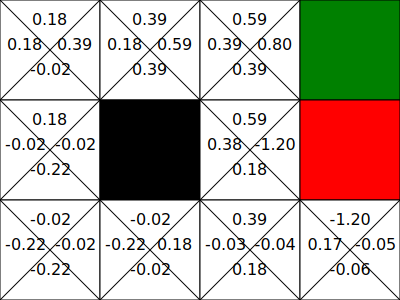

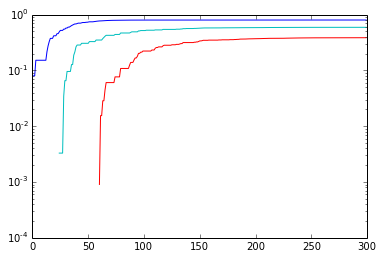

In [7]:
import random

class world:
    # alpha = learning rate
    # gamma = future discount rate
    # stepcost = cost for any action
    def __init__(self, alpha, gamma, stepcost):
        self.alpha = alpha
        self.gamma = gamma
        self.stepcost = stepcost
        
        self.start = (0,0)
        self.states = []
        for x in range(4):
            for y in range(3):
                if x == 1 and y == 1:
                    continue
                if x == 3 and (y == 0 or y == 1):
                    continue
                self.states.append((x,y))
        self.states.append((3,0))
        self.states.append((3,1))
                
        self.actions = {}
        for s in self.states:
            if x == 3 and (y == 0 or y == 1):
                continue
            actions = {}
            (sx, sy) = s
            if (sx, sy - 1) in self.states:
                actions['u'] = (sx, sy-1)
            else:
                actions['u'] = (sx, sy)
            if (sx, sy + 1) in self.states:
                actions['d'] = (sx, sy+1)
            else:
                actions['d'] = (sx, sy)
            if (sx - 1, sy) in self.states:
                actions['l'] = (sx-1, sy)
            else:
                actions['l'] = (sx, sy)
            if (sx + 1, sy) in self.states:
                actions['r'] = (sx+1, sy)
            else:
                actions['r'] = (sx, sy)
            
            self.actions[s] = actions
            
        self.rewards = {}
        for s in self.states:
            self.rewards[s] = 0
            
        self.rewards[(3,0)] = 1
        self.rewards[(3,1)] = -1
        
        self.q = {}
        for state, actions in self.actions.items():
            self.q[state] = {}
            for action in actions.keys():
                self.q[state][action] = 0
                
    def displayQ(self):
        d = {}
        for x in range(4):
            for y in range(3):
                if x == 1 and y == 1:
                    continue
                if x == 3 and (y == 0 or y == 1):
                    continue
                for a in "udlr":
                    d['s%d-%d%s' % (x,y,a)] = self.q[(x,y)][a]
        displayQ(d)
    
    def updateQ(self, state, action, newstate, reward):
        q = self.q[state][action]
        
        q = q + self.alpha * (reward +
                              self.gamma * max(self.q[newstate].values()) -
                              q)
        
        self.q[state][action] = q
        
    def learn(self, iterations):
        state = self.start
        path = ''
        
        for i in range(iterations):
            actions = self.actions[state].keys()
            action = random.choice(actions)
            path += action
            
            newstate = self.actions[state][action]
            reward = self.rewards[newstate] - self.stepcost
            self.updateQ(state, action, newstate, reward)
            #print "moved from %s to %s" % (state, newstate)
            
            if self.rewards[newstate] != 0:
                #print "rewarded ! %s, path = '%s'" % (reward, path)
                break
            
            state = newstate
    
q = [[],[],[],[]]
w = world(alpha=0.1, gamma=0.99, stepcost=0.2)
for i in range(300):
    w.learn(150)
    q[0].append(w.q[(2,0)]['r'])
    q[1].append(w.q[(2,1)]['r'])
    q[2].append(w.q[(2,0)]['d'])
    q[3].append(w.q[(2,1)]['u'])
    
w.displayQ()

from matplotlib import pyplot as plt
plt.semilogy(q[0])
plt.semilogy(q[1])
plt.semilogy(q[2])
plt.semilogy(q[3])